### Codio Activity 9.3: A First Look at the `Ridge` regression model

**Expected Time: 45 Minutes**

**Total Points: 30**

This assignment introduces the `Ridge` regression estimator from scikit-learn.  You will revisit the insurance data from the previous assignment and experiment with varying the `alpha` parameter discussed in Video 9.4. Your work here is a basic introduction where complexity in the preprocessing steps will be added to scale your data.  For now, you are just to familiarize yourself with the `Ridge` regression estimator and its `alpha` parameter. 

#### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)

In [4]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### The Data: Insurance

Below the insurance data is loaded as train and test data with the cubic polynomial features created already.  Similarly, the transformed target feature is attached. 

In [5]:
train_df = pd.read_csv('data/train_cubic.csv')
test_df = pd.read_csv('data/test_cubic.csv')

In [6]:
train_df.head()

,age,bmi,children,age^2,age bmi,age children,bmi^2,bmi children,children^2,age^3,age^2 bmi,age^2 children,age bmi^2,age bmi children,age children^2,bmi^3,bmi^2 children,bmi children^2,children^3
0,61.0,31.160,0.0,3721.0,1900.760,0.0,970.945600,0.00,0.0,226981.0,115946.360,0.0,59227.681600,0.0,0.0,30254.664896,0.0000,0.00,0.0
1,46.0,27.600,0.0,2116.0,1269.600,0.0,761.760000,0.00,0.0,97336.0,58401.600,0.0,35040.960000,0.0,0.0,21024.576000,0.0000,0.00,0.0
2,54.0,31.900,3.0,2916.0,1722.600,162.0,1017.610000,95.70,9.0,157464.0,93020.400,8748.0,54950.940000,5167.8,486.0,32461.759000,3052.8300,287.10,27.0
3,55.0,30.685,0.0,3025.0,1687.675,0.0,941.569225,0.00,0.0,166375.0,92822.125,0.0,51786.307375,0.0,0.0,28892.051669,0.0000,0.00,0.0
4,25.0,45.540,2.0,625.0,1138.500,50.0,2073.891600,91.08,4.0,15625.0,28462.500,1250.0,51847.290000,2277.0,100.0,94445.023464,4147.7832,182.16,8.0


In [7]:
test_df.head()

,age,bmi,children,age^2,age bmi,age children,bmi^2,bmi children,children^2,age^3,age^2 bmi,age^2 children,age bmi^2,age bmi children,age children^2,bmi^3,bmi^2 children,bmi children^2,children^3
0,45.0,25.175,2.0,2025.0,1132.875,90.0,633.780625,50.350,4.0,91125.0,50979.375,4050.0,28520.128125,2265.75,180.0,15955.427234,1267.561250,100.700,8.0
1,36.0,30.020,0.0,1296.0,1080.720,0.0,901.200400,0.000,0.0,46656.0,38905.920,0.0,32443.214400,0.00,0.0,27054.036008,0.000000,0.000,0.0
2,64.0,26.885,0.0,4096.0,1720.640,0.0,722.803225,0.000,0.0,262144.0,110120.960,0.0,46259.406400,0.00,0.0,19432.564704,0.000000,0.000,0.0
3,46.0,25.745,3.0,2116.0,1184.270,138.0,662.805025,77.235,9.0,97336.0,54476.420,6348.0,30489.031150,3552.81,414.0,17063.915369,1988.415075,231.705,27.0
4,19.0,31.920,0.0,361.0,606.480,0.0,1018.886400,0.000,0.0,6859.0,11523.120,0.0,19358.841600,0.00,0.0,32522.853888,0.000000,0.000,0.0


### Problem 1

#### Train and Test data

**5 Points**

Use the `train_df` and `test_df` data to split the data into `X_train`, `X_test`, `y_train` and `y_test`.

Remember that the `target_log` column is the target column for your model.



In [10]:
### GRADED
X_train, X_test, y_train, y_test = '', '', '', ''

### BEGIN SOLUTION
X_train = train_df.drop('target_log', axis = 1)
X_test = test_df.drop('target_log', axis = 1)
y_train = train_df['target_log']
y_test = test_df['target_log']
### END SOLUTION

# Answer check
print(type(X_train))
print(type(y_train))

KeyError: "['target_log'] not found in axis"

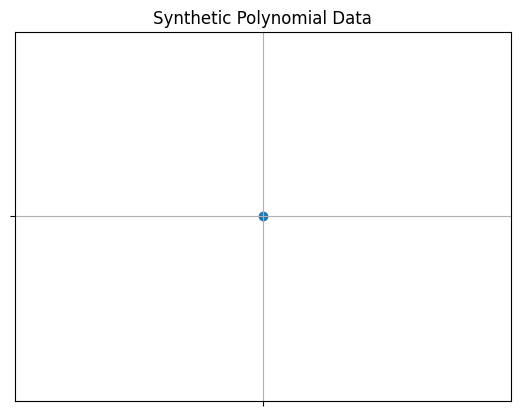

In [6]:
### BEGIN HIDDEN TESTS
X_train_ = train_df.drop('target_log', axis = 1)
X_test_ = test_df.drop('target_log', axis = 1)
y_train_ = train_df['target_log']
y_test_ = test_df['target_log']
#
#
#
pd.testing.assert_frame_equal(X_train, X_train_)
pd.testing.assert_frame_equal(X_test, X_test_)
pd.testing.assert_series_equal(y_test, y_test_)
pd.testing.assert_series_equal(y_train, y_train_)
### END HIDDEN TESTS

### Problem 2

#### Default `Ridge` model

**10 Points**

Now, use the `Ridge` regressor with default settings to build your first model. To this regressor, chain a `fit()` function to  train your model using `X_train` and `y_train`. Assign the resul to `model_1`.

Next, assign `model_1` coefficients as an array to `model_1_coefs` below.  

In [7]:
### GRADED

model_1 = ''
model_1_coefs = ''

### BEGIN SOLUTION
model_1 = Ridge().fit(X_train, y_train)
model_1_coefs = model_1.coef_
### END SOLUTION

# Answer check
print(f'Ridge Coefs: {np.round(model_1_coefs, 2)}')

Ridge Coefs: [ 0.12 -0.04  0.67 -0.   -0.   -0.03  0.   -0.02  0.18  0.   -0.    0.
  0.   -0.    0.   -0.    0.   -0.   -0.02]


In [8]:
### BEGIN HIDDEN TESTS
model_1_ = Ridge().fit(X_train, y_train)
model_1_coefs_ = model_1.coef_

#
#
#
np.testing.assert_array_equal(model_1_coefs, model_1_coefs_)
### END HIDDEN TESTS

### Problem 3

#### Exploring different `alpha` values

**10 Points**

Below, a list of alpha values is given to you. Define a `for` loop to iterate over the list `alphas` to create and train different Ridge models.

Append the coefficients of each Ridge model as a list to `coef_list` below.  

In [9]:
alphas = [0.001, 1.0, 10.0, 100.0]

In [10]:
### GRADED
coef_list = []

### BEGIN SOLUTION
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    coef_list.append(list(ridge.coef_))
### END SOLUTION

# Answer check
len(coef_list)
print('For alpha = 100 we have the following coefficients:')
list(zip(X_train.columns, coef_list[-1]))

For alpha = 100 we have the following coefficients:


[('age', 0.05799556061903649),
 ('bmi', -0.018572771297980843),
 ('children', 0.02488114710602633),
 ('age^2', -6.48582288931546e-05),
 ('age bmi', -0.0005377264952377842),
 ('age children', -0.012800295220730716),
 ('bmi^2', 0.0019230813061402818),
 ('bmi children', 0.017812477462326087),
 ('children^2', 0.07550312112716355),
 ('age^3', 1.2197374179704669e-06),
 ('age^2 bmi', -1.305801343680391e-05),
 ('age^2 children', 0.00025991145849302175),
 ('age bmi^2', 2.488210345244732e-05),
 ('age bmi children', -0.0004527793675625236),
 ('age children^2', 0.0010564893732867937),
 ('bmi^3', -3.621089705724554e-05),
 ('bmi^2 children', 0.00012912466795282057),
 ('bmi children^2', -0.002579667155719841),
 ('children^3', -0.009769612804031453)]

In [11]:
### BEGIN HIDDEN TESTS
coef_list_ = []
for alpha in alphas:
    ridge_ = Ridge(alpha = alpha)
    ridge_.fit(X_train, y_train)
    coef_list_.append(list(ridge_.coef_))
#
#
#
assert coef_list == coef_list_
### END HIDDEN TESTS

### Problem 4

#### Exploring the coefficient for `children`

**5 Points**

To see the effect of varying alpha, you are to focus on the coefficients of the `children` feature.  Use the code `list([i[2] for i in coef_list])` to assign those values as a list to `child_coefs` below, building models on the given list of alphas.   

In general, as you increase `alpha` what happens to the value of the coefficient -- `increase`, `decrease`, or `neither`?  Assign your answer as a string to `ans4` below. 


In [12]:
### GRADED

child_coefs = ''
ans4 = ''

### BEGIN SOLUTION
child_coefs = list([i[2] for i in coef_list])
ans4 = 'decrease'
### END SOLUTION

print(type(child_coefs))
print(ans4)

<class 'list'>
decrease


In [13]:
### BEGIN HIDDEN TESTS
child_coefs_ = list([i[2] for i in coef_list_])
ans4_ = 'decrease'
#
#
#
assert child_coefs_ == child_coefs
assert ans4_ == ans4
### END HIDDEN TESTS